In [4]:
import pandas as pd

data = [
    ("ham", "Hey are we meeting today at 6 pm?"),
    ("spam", "WINNER!! You have won a free ₹10,000 voucher. Call now!"),
    ("ham", "Please send me the notes from yesterday's class."),
    ("spam", "Congratulations! You are selected for a free lottery prize. Reply YES to claim."),
    ("ham", "I'll call you once I reach home."),
    ("spam", "URGENT! Your account has been compromised. Click the link to secure it."),
]

df = pd.DataFrame(data, columns=["label", "message"])
df.to_csv("../data/spam.csv", index=False)

df.head()


,label,message
0,ham,Hey are we meeting today at 6 pm?
1,spam,"WINNER!! You have won a free ₹10,000 voucher. ..."
2,ham,Please send me the notes from yesterday's class.
3,spam,Congratulations! You are selected for a free l...
4,ham,I'll call you once I reach home.


In [5]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [6]:
X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [7]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [8]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [9]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



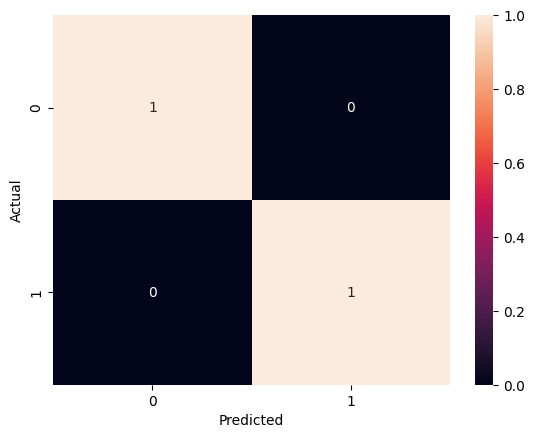

In [10]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [11]:
sample = ["Congratulations! You won a free iPhone"]
sample_tfidf = vectorizer.transform(sample)
model.predict(sample_tfidf)


array([1])

In [12]:
import pickle

pickle.dump(model, open("../src/spam_model.pkl", "wb"))
pickle.dump(vectorizer, open("../src/vectorizer.pkl", "wb"))
